## TASK 1 : Read CSV data from two files and merge it into a single Data Frame

In [2]:
# Import pandas
import pandas as pd

# Import the two csv files to be used for this exercise
dataframe1 = pd.read_csv('../Downloads/task2a.csv')
dataframe2 = pd.read_csv('../Downloads/task2b.csv')

# Use the pandas merge function and merge on the common column, which is 'id-student'
all_df = pd.merge(dataframe1, dataframe2, on='id_student')
all_df

,Unnamed: 0,id_student,gender,region,highest_education,age_band,disability,final_result,score,click_events
0,0,11391,M,East Anglian Region,HE Qualification,55<=,N,Pass,82.0,934.0
1,1,28400,F,Scotland,HE Qualification,35-55,N,Pass,67.0,1435.0
2,2,31604,F,South East Region,A Level or Equivalent,35-55,N,Pass,76.0,2158.0
3,3,32885,F,West Midlands Region,Lower Than A Level,0-35,N,Pass,55.0,1034.0
4,4,38053,M,Wales,A Level or Equivalent,35-55,N,Pass,68.0,2445.0
...,...,...,...,...,...,...,...,...,...,...
26716,26741,2620947,F,Scotland,A Level or Equivalent,0-35,Y,Distinction,89.0,476.0
26717,26742,2645731,F,East Anglian Region,Lower Than A Level,35-55,N,Distinction,89.0,893.0
26718,26743,2648187,F,South Region,A Level or Equivalent,0-35,Y,Pass,77.0,312.0
26719,26744,2679821,F,South East Region,Lower Than A Level,35-55,N,Withdrawn,92.0,275.0


## Task 2: Clean the merged data

In [3]:
 # Get the total sum of entries with missing values
print(all_df.isna().sum())  

Unnamed: 0              0
id_student              0
gender                  0
region                  0
highest_education       0
age_band                0
disability              0
final_result            0
score                  19
click_events         1371
dtype: int64


In [4]:
"""
There are only empty values in the score and click_events column.
The missing values in those columns will be dropped.
"""

all_df.dropna(subset=['click_events', 'score'], axis=0, inplace=True)


# Drop unecessary columns
cleaned_df =all_df.drop(columns=['region', 'highest_education', 'final_result'], axis=1)

cleaned_df 

,Unnamed: 0,id_student,gender,age_band,disability,score,click_events
0,0,11391,M,55<=,N,82.0,934.0
1,1,28400,F,35-55,N,67.0,1435.0
2,2,31604,F,35-55,N,76.0,2158.0
3,3,32885,F,0-35,N,55.0,1034.0
4,4,38053,M,35-55,N,68.0,2445.0
...,...,...,...,...,...,...,...
26716,26741,2620947,F,0-35,Y,89.0,476.0
26717,26742,2645731,F,35-55,N,89.0,893.0
26718,26743,2648187,F,0-35,Y,77.0,312.0
26719,26744,2679821,F,35-55,N,92.0,275.0


## Task 3: Filter out unnecessary rows where the click events is less than or equal 20000

In [5]:
# Filter the full dataframe for where the click events is less than or equal 20000
cleaned_df[cleaned_df['click_events'] <= 20000]

# Get the sum of duplicated id_student
print(f"There are {cleaned_df['id_student'].duplicated().sum()} duplicates on the id_student column")

# Remove the duplicate records based on id_student
cleaned_df = cleaned_df.drop_duplicates(subset='id_student')

cleaned_df


There are 3192 duplicates on the id_student column


,Unnamed: 0,id_student,gender,age_band,disability,score,click_events
0,0,11391,M,55<=,N,82.0,934.0
1,1,28400,F,35-55,N,67.0,1435.0
2,2,31604,F,35-55,N,76.0,2158.0
3,3,32885,F,0-35,N,55.0,1034.0
4,4,38053,M,35-55,N,68.0,2445.0
...,...,...,...,...,...,...,...
26716,26741,2620947,F,0-35,Y,89.0,476.0
26717,26742,2645731,F,35-55,N,89.0,893.0
26718,26743,2648187,F,0-35,Y,77.0,312.0
26719,26744,2679821,F,35-55,N,92.0,275.0


## Task 4 : Investigate the effects of engagement on attainment

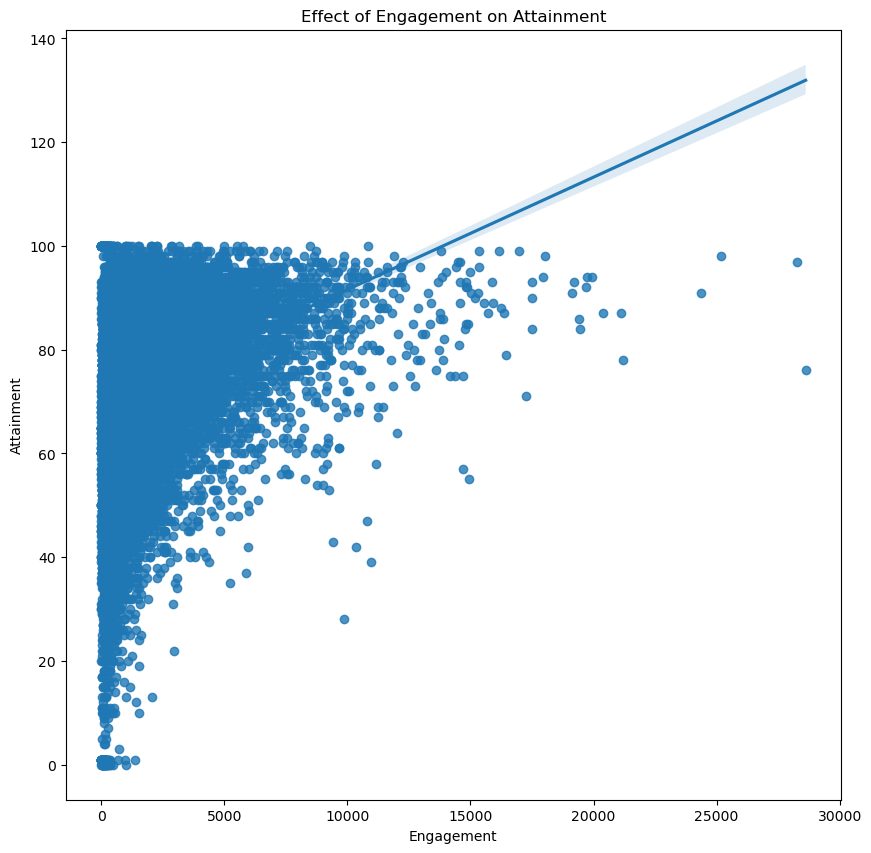

In [7]:
# Import the visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

"""
    The relationship between click_events and score will be considered in other 
    to investigate the effect of engagement on attainment
"""

# Call the necessary matplotlib functions and use seaborn's regplot
plt.figure(figsize=(10,10))
sns.regplot(data=cleaned_df, x='click_events', y='score')

plt.title('Effect of Engagement on Attainment')
plt.xlabel('Engagement')
plt.ylabel('Attainment')
plt.show()

## TAsk 5: Explain The Effect of Engagement on Attainment

##### Analyzing the graph, the presence of a positive relationship  between Engagement and Attainment becomes apparent when observing the regression line. 
##### The scores demonstrate an increase with the rise in click_events, suggesting a direct influence of Engagement on Attainment levels. 
##### Additionally, the prevalence of numerous students exhibiting low engagement yet achieving very high attainment raises the possibility of outliers or anomalies within the dataset

##  Task 6: Test the hypothesis that engagement has some effect on levels of attainment

In [10]:
# import the stats library from scipy to calculate correlation and p-value
from scipy import stats


engagement = cleaned_df['click_events']
attainment = cleaned_df['score']

significant_level = 0.05

# Call pearsonr to get the correlation coefficient and p-value
corr, p_value = stats.pearsonr(engagement, attainment)

# Print out their values
print(f"Correlation coefficient = {round(corr, 3)}, p-value = {round(p_value, 4)} \n")

Correlation coefficient = 0.277, p-value = 0.0 



##### From the value of the correlation coefficient which is 0.277, it indicates that there is a weak-positive  relationship between engagement and levels of attainment.
##### Also, considering that the p-value of 0.0 is insignificant and less than 0.05, we can reject the null hypothesis. 
##### This indicates that the results are statistically significant and there is a level of relationship between engagement and attainment.

## Task 7: Investigate the effects of gender on levels of attainment

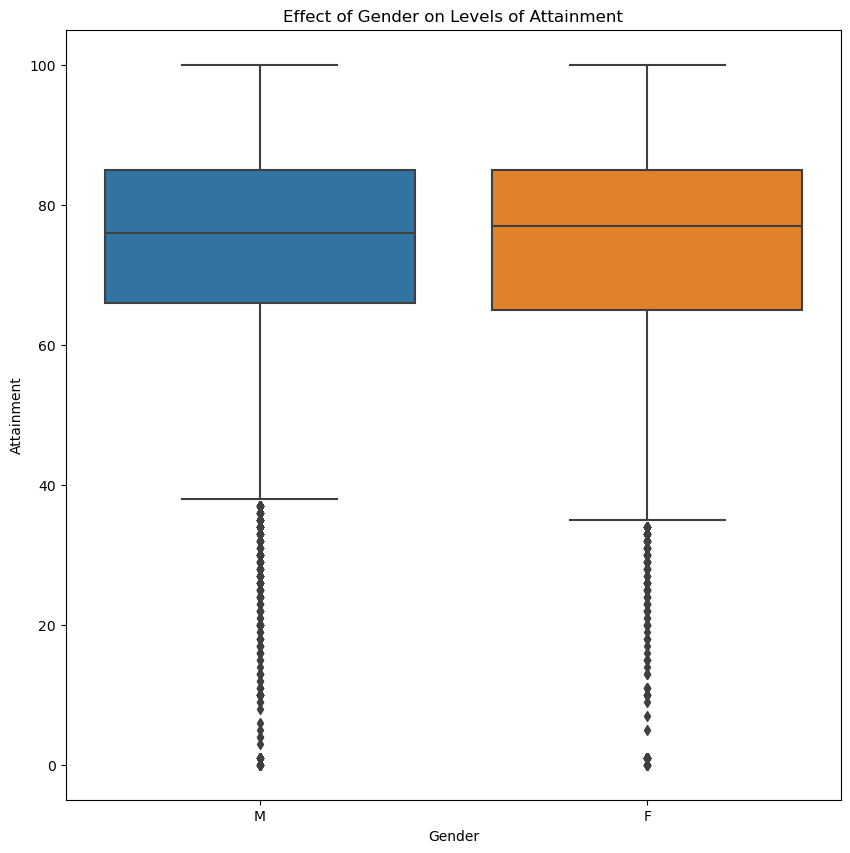

In [12]:
# Call the necessary matplotlib functions and use seaborn's boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=cleaned_df, x='gender', y='score').set_title('Effect of Gender on Levels of Attainment')
plt.xlabel('Gender')
plt.ylabel('Attainment')
plt.show()

## Discuss The Effects of gender on levels of attainment


##### The presented boxplot illustrates the score distribution categorized by gender. Upon examination, the following observations are evident:

##### The minimum score for male students is approximately 39, while that for female students is approximately 38.
##### Both genders exhibit a similar 25th percentile, approximately at 62.
##### The median scores for both male and female students are approximately 75.
##### Similarities are observed in the 75th percentile, approximately at 83, and maximum scores of 100 for both genders.
##### The boxplot reveals numerous outliers, with male students displaying a higher prevalence compared to female students. 
##### Despite these outliers, it can be concluded that gender does not significantly influence the students' attainment levels. 
##### The presence of outliers suggests potential data errors impacting the plots. This observation aligns with the scatter plot 
##### analysis, where students with exceptionally low engagements still achieved remarkably high attainment, potentially influenced 
##### by the presence of outliers in the dataset.

## Task 8: Test if there is any difference between the attainment of male and female students

In [16]:
# Create a function to convert the genders from M and F to 0 and 1
def convert_gender(gender):
    if gender == 'M':
        return 0
    else:
        return 1

# Apply the function on the gender column of the dataframe and store it in gendder
gender = cleaned_df['gender'].apply(convert_gender)

# store the score column of the dataframe into attainment
attainment = cleaned_df['score']

significant_level = 0.05

# Call pearsonr to get the correlation coefficient and p-value
corr, p_value = stats.pearsonr(gender, attainment)

# Print their values
print(f"Correlation coefficient = {round(corr, 3)}, p-value = {round(p_value, 4)} \n")

Correlation coefficient = -0.005, p-value = 0.5021 



#### Examining the calculated correlation coefficient, we observe a value of -0.005, 
#### signifying a negative correlation due to the negative sign. However,  considering that the value is very small and insignificant, 
#### we can assert that there is no  correlation between students' attainment  and their gender. The corresponding p-value of 0.5021  surpasses the established significance level of 0.05, leading us  to fail to reject the null hypothesis. 
#### In summation, we can confidently conclude that the gender of students does not exert any discernible effect on their levels of attainment.